In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#reading csv file.
df = pd.read_csv('Salary_Data.csv')

Now, Let's check the structure of the dataset.

In [3]:
#displaying the first 5 rows.
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [4]:
#displaying the last five rows.
df.tail()

,YearsExperience,Age,Salary
25,9.0,34.0,105582
26,9.5,35.0,116969
27,9.6,36.0,112635
28,10.3,37.0,122391
29,10.5,38.0,121872


In [5]:
#shape of dataset.
df.shape

(30, 3)

In [6]:
#information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Age              30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [7]:
#statistical information.
df.describe()

,YearsExperience,Age,Salary
count,30.000000,30.000000,30.000000
mean,5.313333,27.216667,76003.000000
std,2.837888,5.161267,27414.429785
min,1.100000,21.000000,37731.000000
25%,3.200000,23.300000,56720.750000
50%,4.700000,25.000000,65237.000000
75%,7.700000,30.750000,100544.750000
max,10.500000,38.000000,122391.000000


In [8]:
#checking for null values.
df.isnull().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

### Correlation.

In [9]:
df.corr()

,YearsExperience,Age,Salary
YearsExperience,1.000000,0.987258,0.978242
Age,0.987258,1.000000,0.974530
Salary,0.978242,0.974530,1.000000


## Data Visualization.

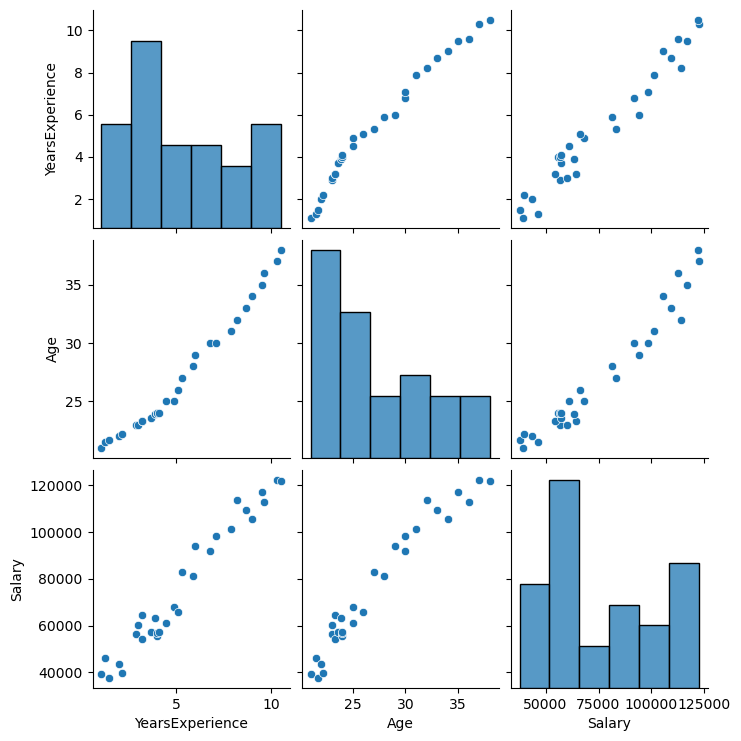

In [10]:
#pairPlot.
sns.pairplot(df)

In [63]:
#independent variable - x
#dependent variable/target variable - y
x = pd.DataFrame(df['YearsExperience'])
y = df['Salary']

In [64]:
#train and test split.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [65]:
#training the model.
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [66]:
#predecting the salary with training data.
x_predict = model.predict(x_train)

### Visualization.

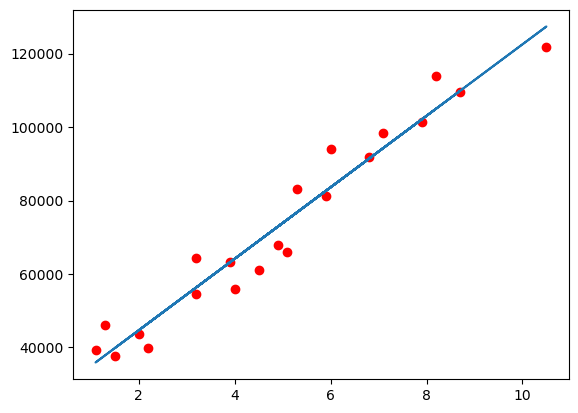

In [67]:
plt.plot(x_train,x_predict)
plt.scatter(x_train,y_train,c='r')
plt.show()

In [68]:
#predicting salary with train dataset.
y_pred = model.predict(x_test)
y_pred=y_pred.ravel()

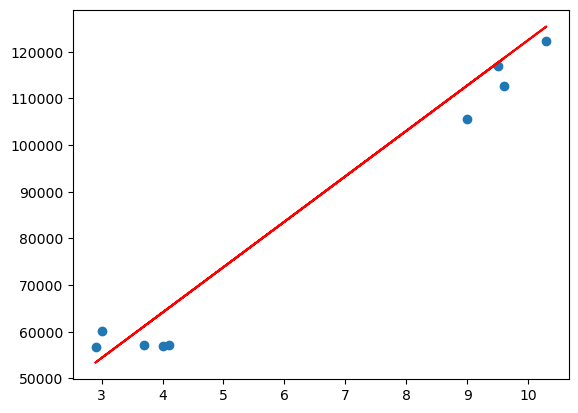

In [69]:
#visualization.
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,c='r')
plt.show()

In [86]:
#comparing predicted value and actual value.
pd.DataFrame({'Salary_Actual':y_test,'Salary_Predicted':y_pred,"Difference":abs(y_test-y_pred)})

,Salary_Actual,Salary_Predicted,Difference
9,57189,61208.341988,4019.341988
26,116969,117649.324249,680.324249
28,122391,125434.287320,3043.287320
13,57081,65100.823523,8019.823523
5,56642,53423.378917,3218.621083
12,56957,64127.703139,7170.703139
27,112635,118622.444633,5987.444633
25,105582,112783.722330,7201.722330
6,60150,54396.499301,5753.500699


In [88]:
#Average difference.
avgDiff = sum(abs(y_test-y_pred))/len(abs(y_test-y_pred))
avgDiff

5010.529885004953

In [83]:
#evaluating metrics for regression model.
mae=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r2=metrics.r2_score(y_test, y_pred)
rmsle=np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

pd.DataFrame([mae,mse,rmse,r2,rmsle],index=['MAE','MSE','RMSE','R2_Score','RMSLE'],columns=['metrics'])

,metrics
MAE,5.010530e+03
MSE,3.031030e+07
RMSE,5.505479e+03
R2_Score,9.627669e-01
RMSLE,8.613499e+00
